In [109]:
import matplotlib.pyplot as plt
import pandas as pd

In [110]:
#Read the data into pandas dataFrames
dfPokeData = pd.read_csv("pokemonInfo.csv")
dfTypeColors  = pd.read_csv("typeColors.csv")

In [111]:
#Count how many times a type shows up in Pokedex
mainTypeCount = dfPokeData["Type 1"].value_counts()
totalTypeCount = mainTypeCount.to_frame()
secondTypeCount = dfPokeData["Type 2"].value_counts()
totalTypeCount["count2"] = secondTypeCount
print(totalTypeCount)

          count  count2
Type 1                 
Water       134      20
Normal      118      13
Grass       103      24
Bug          83       9
Fire         66      15
Psychic      60      42
Electric     59      10
Rock         58      16
Dark         45      24
Poison       42      41
Ground       40      35
Fighting     40      33
Dragon       37      33
Steel        36      29
Ghost        35      30
Ice          31      17
Fairy        29      35
Flying        9     100


In [112]:
#Make the color list
typeColors = []
for c in dfTypeColors.itertuples():
  if("GEN 7 — SM" in c.Gen and "inium" not in c.Gen):
    typeColors.append(c.colors[:7])
    

In [166]:
#Add colors to the dataFrame
totalTypeCount = totalTypeCount.sort_values(by= "Type 1")
totalTypeCount["typeColors"] = typeColors

In [167]:
def hex_to_rgb(hexa):
    hexa = hexa[1:]
    return tuple((int(hexa[i:i+2], 16)/500)  for i in (0, 2, 4))

In [168]:
totalTypeCount["total"] = totalTypeCount["count"] + totalTypeCount["count2"]
#totalTypeCount = totalTypeCount.sort_values(by= "total")
totalTypeCount["lightTypeColors"]  = totalTypeCount["typeColors"]
totalTypeCount["lightTypeColors"] = totalTypeCount["lightTypeColors"].apply(hex_to_rgb)
print(totalTypeCount)


          count  count2 typeColors  total        lightTypeColors
Type 1                                                          
Bug          83       9    #AABB22     92   (0.34, 0.374, 0.068)
Dark         45      24    #775544     69   (0.238, 0.17, 0.136)
Dragon       37      33    #7766EE     70  (0.238, 0.204, 0.476)
Electric     59      10    #FFCC33     69   (0.51, 0.408, 0.102)
Fairy        29      35    #FFAAFF     64     (0.51, 0.34, 0.51)
Fighting     40      33    #BB5544     73   (0.374, 0.17, 0.136)
Fire         66      15    #FF4422     81   (0.51, 0.136, 0.068)
Flying        9     100    #6699FF    109   (0.204, 0.306, 0.51)
Ghost        35      30    #6666BB     65  (0.204, 0.204, 0.374)
Grass       103      24    #77CC55    127   (0.238, 0.408, 0.17)
Ground       40      35    #DDBB55     75   (0.442, 0.374, 0.17)
Ice          31      17    #77DDFF     48   (0.238, 0.442, 0.51)
Normal      118      13    #BBBBAA    131   (0.374, 0.374, 0.34)
Poison       42      41  

In [169]:
for x in totalTypeCount.itertuples():
    print(x.Index, x.total, end = ", ")

Bug 92, Dark 69, Dragon 70, Electric 69, Fairy 64, Fighting 73, Fire 81, Flying 109, Ghost 65, Grass 127, Ground 75, Ice 48, Normal 131, Poison 83, Psychic 102, Rock 74, Steel 65, Water 154, 

Text(0, 0.5, 'Count')

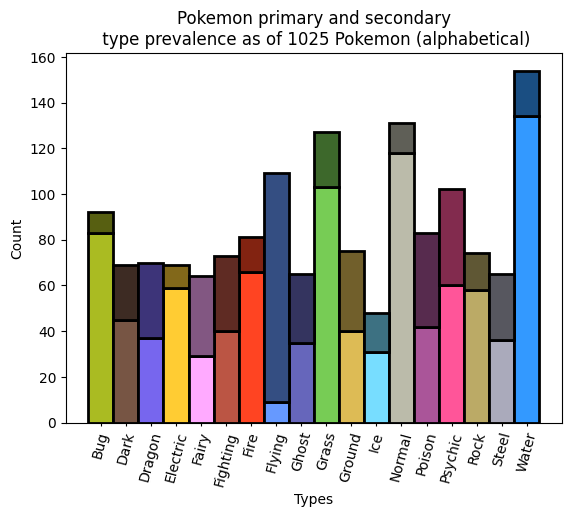

In [170]:
fig, axs = plt.subplots()

axs.bar(totalTypeCount.index, totalTypeCount["count"], color = totalTypeCount["typeColors"], width = 1, edgecolor='black', linewidth=2)
axs.bar(totalTypeCount.index, totalTypeCount["count2"], color = totalTypeCount["lightTypeColors"], bottom = totalTypeCount["count"], width = 1, edgecolor='black', linewidth=2)


axs.tick_params(axis='x', labelrotation=75, length = 2)
axs.set_title("Pokemon primary and secondary\n type prevalence as of 1025 Pokemon (alphabetical)")
axs.set_xlabel("Types")
axs.set_ylabel("Count")